# IIIF Text Spotting Example with *État Major* map sheet

# Download

In [1]:
from mapreader import IIIFDownloader

from piffle.load_iiif import load_iiif_image, load_iiif_presentation

In [2]:
# Manifest from Rumsey Collection - https://www.davidrumsey.com/luna/servlet/iiif/m/RUMSEY~8~1~362808~90130411/manifest
# Allmaps viewer - https://viewer.allmaps.org/?url=https://annotations.allmaps.org/images/3b1dc71e2f7f5488
# Allmaps georeference annotation - https://annotations.allmaps.org/images/3b1dc71e2f7f5488
# Allmaps xyz (map) - https://allmaps.xyz/maps/a6b77c925eeb6f71/{z}/{x}/{y}@2x.png


downloader = IIIFDownloader(
    "https://annotations.allmaps.org/images/3b1dc71e2f7f5488",
    iiif_versions=3,
    iiif_uris="https://annotations.allmaps.org/images/3b1dc71e2f7f5488"
)

[WARNING] AnnotationPage is missing 'id' field.


In [3]:
downloader.save_georeferenced_maps()

  0%|          | 0/1 [00:00<?, ?it/s]

[INFO] 'a6b77c925eeb6f71' already exists. Skipping download.


# Load

https://mapreader.readthedocs.io/en/latest/using-mapreader/step-by-step-guide/2-load.html

In [4]:
from mapreader import loader

In [5]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None  # Disable limit on image size

my_files = loader("/Users/kmcdonough/Github/MapReader_all/mapreader-examples/notebooks/geospatial/iiif_download/maps/a6b77c925eeb6f71_masked.tif")

  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# len() shows the total number of images currently read (or sliced, see below)
print(f"Number of images: {len(my_files)}")

Number of images: 1


In [7]:
print(my_files)

#images: 1

#parents: 1
a6b77c925eeb6f71_masked.tif

#patches: 0



In [8]:
my_files.add_metadata("./maps/metadata.csv")

[INFO] Loading metadata from CSV/TSV/etc file.


In [9]:
parent_list = my_files.list_parents()

## Patchify map

In [11]:
my_files.patchify_all(patch_size=1000, path_save="./patches_1000_pixel")  # in pixels

[INFO] Saving patches in directory named "./patches_1000_pixel".


  0%|          | 0/1 [00:00<?, ?it/s]

maps/a6b77c925eeb6f71_masked.tif


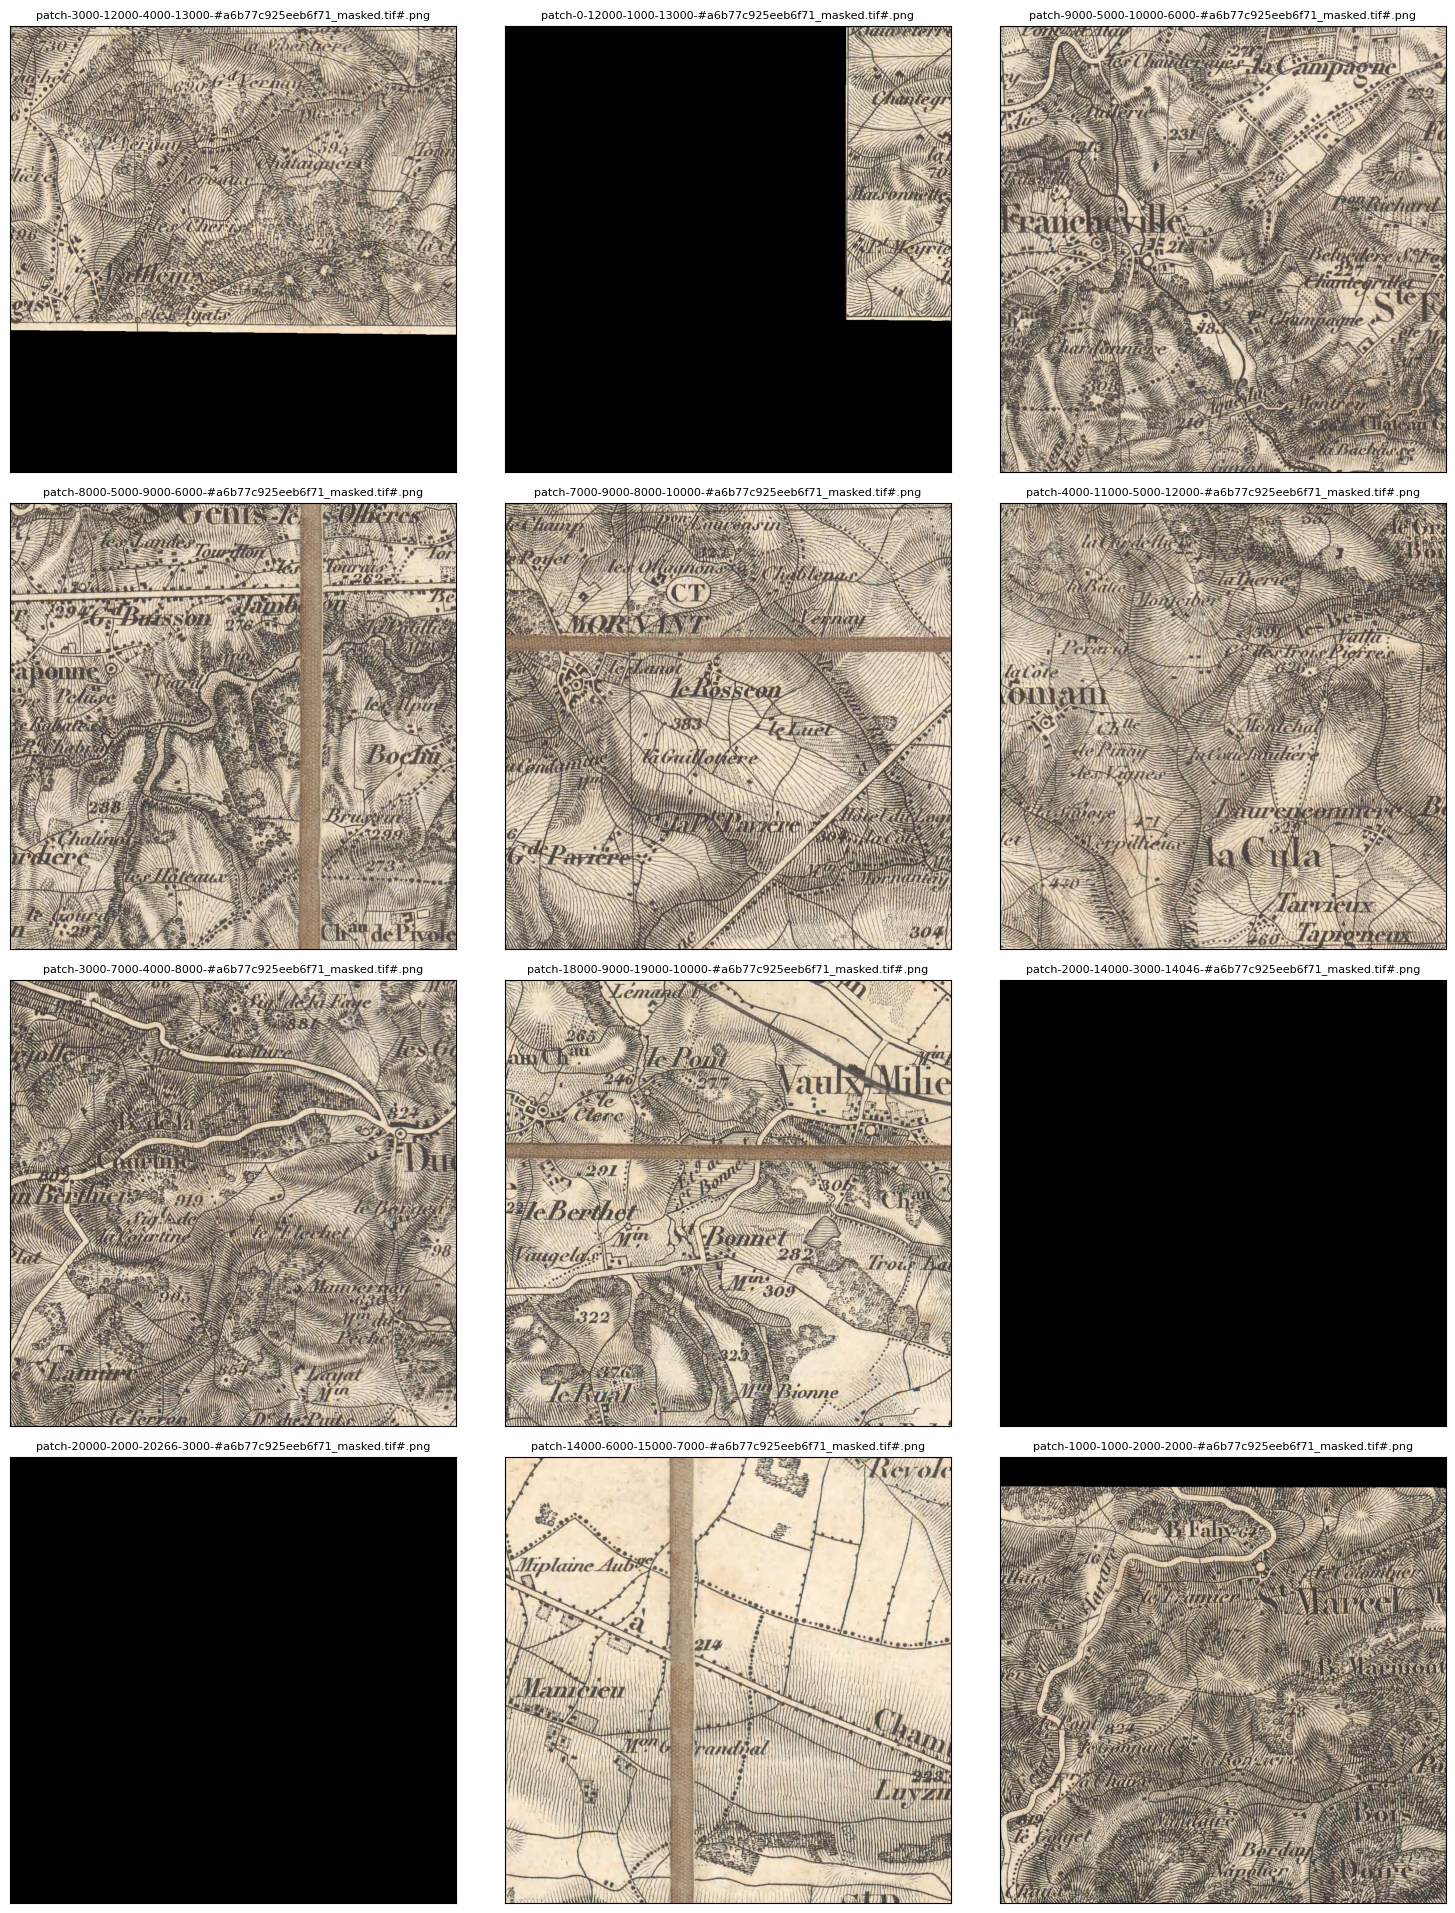

In [13]:
my_files.show_sample(num_samples=12, tree_level="patch")

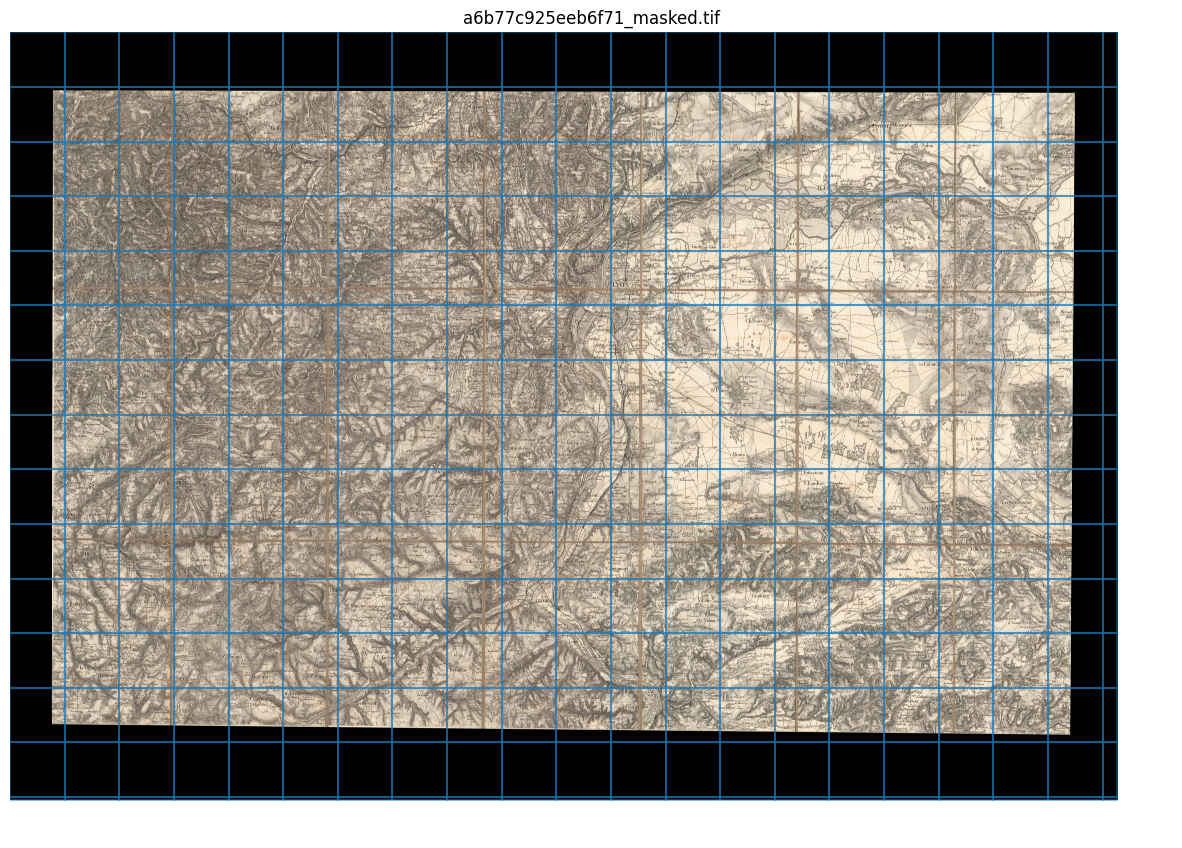

In [14]:
my_files.show_patches(
    parent_id=parent_list[0],
    figsize=(15, 15)
)

Add coordinate increments for text spotting

In [15]:
my_files.add_coord_increments()

[INFO] Add coord-increments, tree level: parent


  0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
parent_df, patch_df = my_files.convert_images(save=True)

[INFO] Saved parent dataframe as "parent_df.csv"
[INFO] Saved patch dataframe as "patch_df.csv"


In [20]:
parent_df.head()

parent_id  \
image_id                                
a6b77c925eeb6f71_masked.tif      None   

                                                                    image_path  \
image_id                                                                         
a6b77c925eeb6f71_masked.tif  /Users/kmcdonough/Github/MapReader_all/mapread...   

                                                                   coordinates  \
image_id                                                                         
a6b77c925eeb6f71_masked.tif  (4.3539327415061075, 45.46649003157989, 5.2543...   

                                   crs              shape  \
image_id                                                    
a6b77c925eeb6f71_masked.tif  EPSG:4326  (14046, 20266, 3)   

                                                                      geometry  \
image_id                                                                         
a6b77c925eeb6f71_masked.tif  POLYGON ((5.25440 45.46649, 5.25440 45.91261, ...   

                                                    name                id  \
image_id                                                                     
a6b77c925eeb6f71_masked.tif  a6b77c925eeb6f71_masked.tif  a6b77c925eeb6f71   

                             iiif_uri  \
image_id                                
a6b77c925eeb6f71_masked.tif       NaN   

                                                                       patches  \
image_id                                                                         
a6b77c925eeb6f71_masked.tif  [patch-0-0-1000-1000-#a6b77c925eeb6f71_masked....   

                                 dlon      dlat  
image_id                                         
a6b77c925eeb6f71_masked.tif  0.000044  0.000032

In [21]:
patch_df.head()

parent_id  \
image_id                                                                          
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  a6b77c925eeb6f71_masked.tif   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  a6b77c925eeb6f71_masked.tif   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  a6b77c925eeb6f71_masked.tif   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  a6b77c925eeb6f71_masked.tif   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  a6b77c925eeb6f71_masked.tif   

                                                                                           image_path  \
image_id                                                                                                
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  /Users/kmcdonough/Github/MapReader_all/mapread...   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  /Users/kmcdonough/Github/MapReader_all/mapread...   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  /Users/kmcdonough/Github/MapReader_all/mapread...   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  /Users/kmcdonough/Github/MapReader_all/mapread...   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  /Users/kmcdonough/Github/MapReader_all/mapread...   

                                                              shape  \
image_id                                                              
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  (1000, 1000, 3)   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  (1000, 1000, 3)   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  (1000, 1000, 3)   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  (1000, 1000, 3)   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  (1000, 1000, 3)   

                                                             pixel_bounds  \
image_id                                                                    
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...     (0, 0, 1000, 1000)   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  (0, 1000, 1000, 2000)   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  (0, 2000, 1000, 3000)   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  (0, 3000, 1000, 4000)   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  (0, 4000, 1000, 5000)   

                                                                                          coordinates  \
image_id                                                                                                
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  (4.3539327415061075, 45.88084529371504, 4.3983...   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  (4.3539327415061075, 45.84908419742996, 4.3983...   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  (4.3539327415061075, 45.81732310114488, 4.3983...   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  (4.3539327415061075, 45.7855620048598, 4.39836...   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  (4.3539327415061075, 45.75380090857472, 4.3983...   

                                                          crs  \
image_id                                                        
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  EPSG:4326   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  EPSG:4326   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  EPSG:4326   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  EPSG:4326   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  EPSG:4326   

                                                                                             geometry  
image_id                                                                                               
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  POLYGON ((4.39837 45.88085, 4.39837 45.91261, ...  
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  POLYGON ((4.39837 45.84908, 4.39837 45.88085, ...  
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  POLYGON ((4.39837 45.81732, 4.39837 45.84908, ...  
pa

In [22]:
patch_list = my_files.list_patches()

In [23]:
import os

MAPTEXT_PATH = os.getenv("MAPTEXT_PATH")
MAPTEXT_MODEL_PATH = os.getenv("MAPTEXT_MODEL_PATH")

!pip install timm

In [27]:
from mapreader import MapTextRunner

#EXAMPLE
my_runner = MapTextRunner(
    patch_df,
    parent_df,
    cfg_file = "MapTextPipeline/configs/ViTAEv2_S/rumsey/final_rumsey.yaml",
    weights_file = "./rumsey-finetune.pth"
)

ImportError: cannot import name 'MapTextRunner' from 'mapreader' (/Users/kmcdonough/Github/MapReader_all/MapReader/mapreader/__init__.py)